# GRIP - The Sparks Foundation

# Data Science and Business Analytics

# Name - Nalini Meenakshi

# Task 3 - Exploratory Data Analysis - Retail

<br>

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Exploratory Data Analysis

In [3]:
data.shape

(9994, 13)

**Inference:** The dataset contains 9994 rows and 13 columns in it.

In [4]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

**Inference:** From the above result, we can infer that, all the variables in the dataset has appropriate data types assigned to it. Hence, there is no need for data type conversion.

In [5]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Inference:** There are no null/missing values present in the dataset.

In [6]:
data.duplicated().sum()

17

**Inference:** There are 17 duplicated data present in the dataset. Hence, we can remove it using drop duplicates function.

In [7]:
df = data.drop_duplicates(keep = 'first')
df.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


In [8]:
df.duplicated().sum()

0

**Inference:** From the above result, we can see that, there are no more duplicated values present in the dataset after using the drop_duplicates function.

In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Inference:** The above result shows the number of unique sub categories or levels in each columns. Here, since, postal code and city is not necessary for our dataset, we'll drop it.

In [10]:
df_drop = df.drop(['City','Postal Code'],axis = 1)
df_drop.head(1)

,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136


**Inference:** From the above result, we can see that, the columns 'Postal Code' and 'City' is dropped.

### Outlier Detection

<AxesSubplot:>

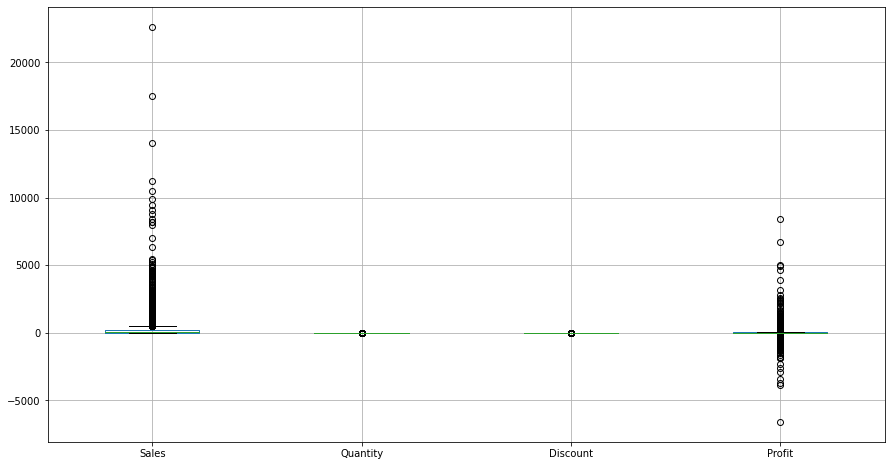

In [11]:
plt.figure(figsize = (15,8))
df_drop.boxplot()

### Sales 

<AxesSubplot:>

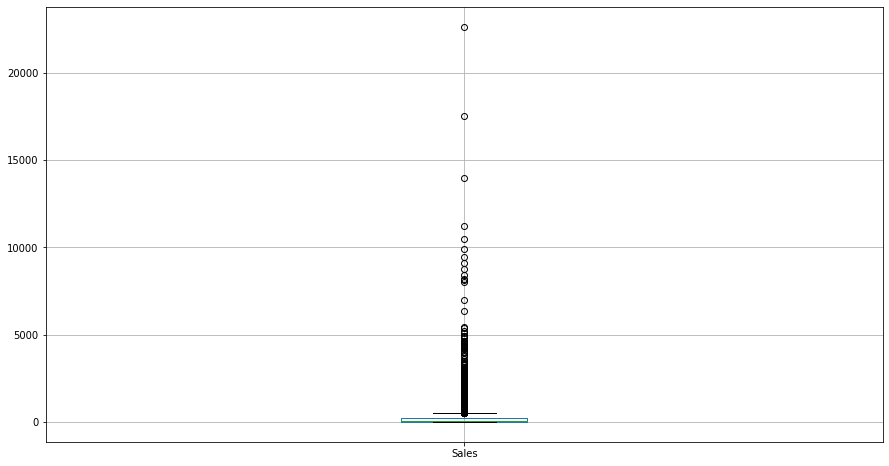

In [12]:
plt.figure(figsize = (15,8))
df_drop[['Sales']].boxplot()

### Quantity

<AxesSubplot:>

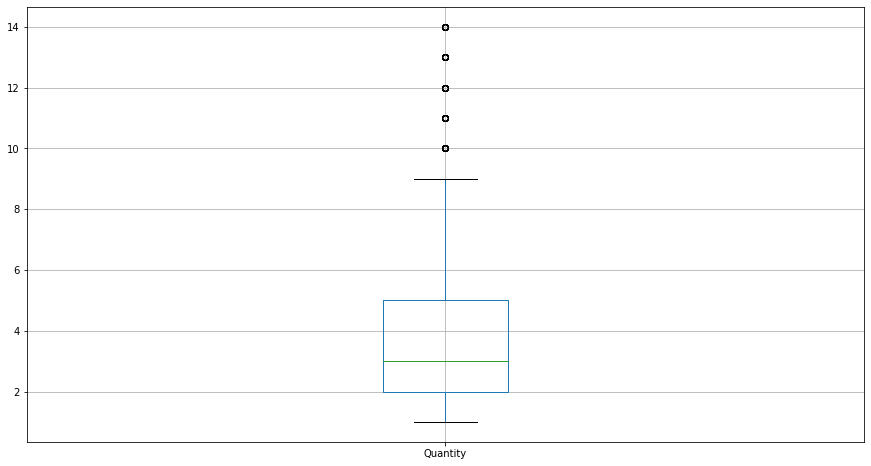

In [13]:
plt.figure(figsize = (15,8))
df_drop[['Quantity']].boxplot()

### Discount

<AxesSubplot:>

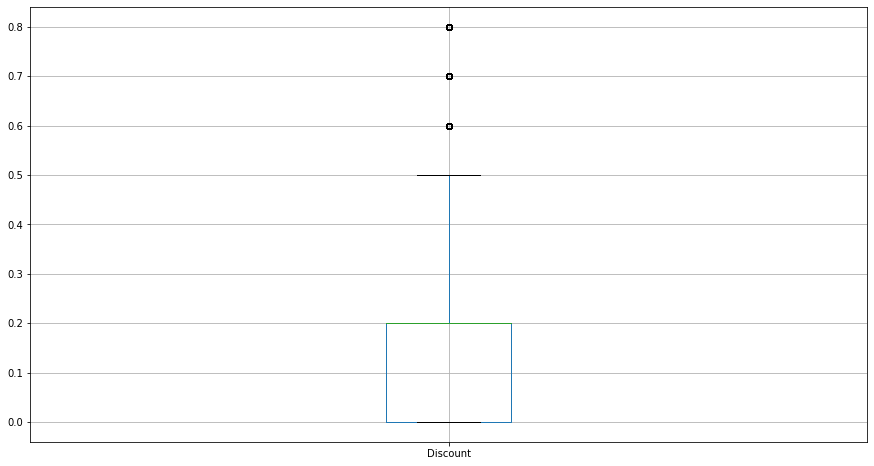

In [14]:
plt.figure(figsize = (15,8))
df_drop[['Discount']].boxplot()

### Profit

<AxesSubplot:>

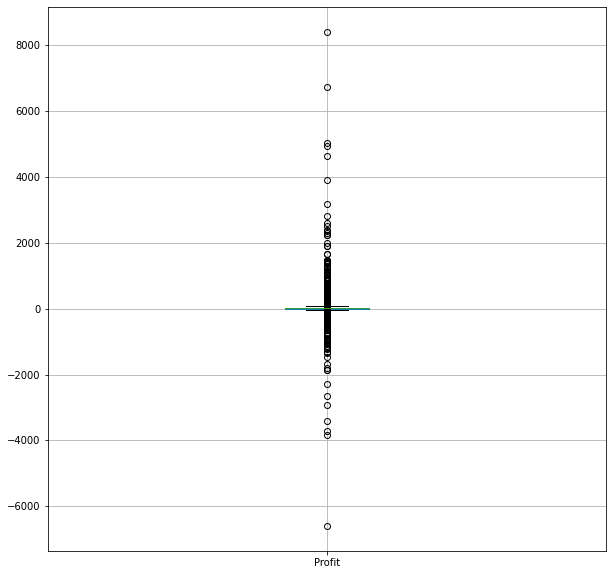

In [15]:
plt.figure(figsize = (10,10))
df_drop[['Profit']].boxplot()

**Inference:** Since, there are large outliers present in the columns 'Sales' and 'Profit'. Also, there are very few outliers in the columns 'Quantity' and 'Discount'. We perform IQR treatment to reduce these outliers.

### IQR Treatment

In [16]:
q3 = df_drop.quantile(0.75)
q1 = df_drop.quantile(0.25)
iqr = q3 - q1

In [17]:
df1 = df_drop[~((df_drop < (q1 - 1.5 * iqr)) | (df_drop > (q3 + 1.5 * iqr))).any(axis=1)]

In [18]:
# shape of dataset after removing outliers

df1.shape

(7127, 11)

In [19]:
# shape of dataset before removing outliers

df.shape ## Since i dropped f

(9977, 13)

<AxesSubplot:>

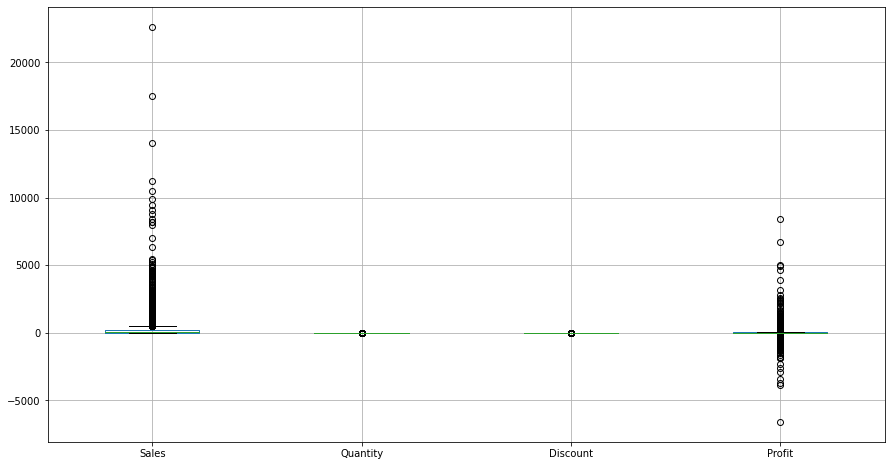

In [20]:
# boxplot pf variables before removing outliers

plt.figure(figsize = (15,8))
df_drop.boxplot()

<AxesSubplot:>

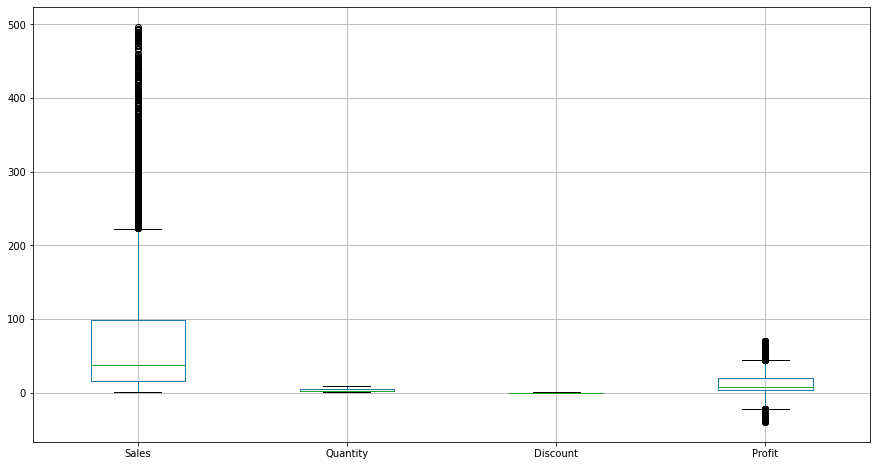

In [21]:
# boxplot of variables after removing outliers

plt.figure(figsize = (15,8))
df1.boxplot()

**Inference:** From the above result, we can conclude that, almost all the outliers are removed from the columns 'Quantity' and 'Discount'. But, also there are few outliers present in the column 'Sales' and 'Profit'.


### Correlation using Heatmap 

<AxesSubplot:>

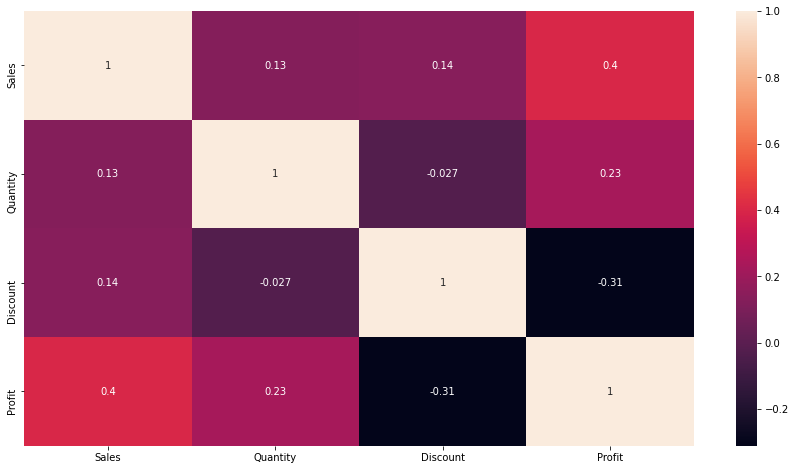

In [22]:
plt.figure(figsize = (15,8))
sns.heatmap(df1.corr(), annot = True)

**Inference:** From the above heatmap, we can see that there are no variables affecting profit. Also, there are no variables multicollineared. From this, we can conclude that there are no strong relationship between variables.

# Visualization of Plots for Profit

### SALES vs PROFIT BEFORE DROPPING OUTLIERS

In [23]:
# Disocunt wise Sales before removing outliers

df.groupby('Discount')['Sales'].sum()

Discount
0.00    1.087278e+06
0.10    5.436935e+04
0.15    2.755852e+04
0.20    7.645049e+05
0.30    1.029453e+05
0.32    1.449346e+04
0.40    1.164178e+05
0.45    5.484974e+03
0.50    5.891854e+04
0.60    6.644700e+03
0.70    4.062028e+04
0.80    1.696019e+04
Name: Sales, dtype: float64

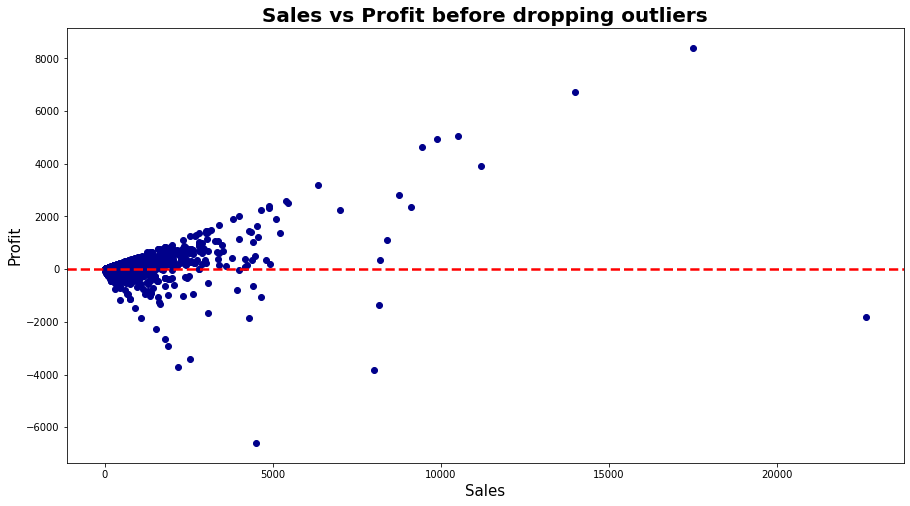

In [24]:
plt.figure(figsize = (15,8))
plt.scatter(df['Sales'],df['Profit'], color = 'darkblue')
plt.xlabel('Sales',fontsize = 15)
plt.ylabel('Profit',fontsize = 15)
plt.title('Sales vs Profit before dropping outliers', fontweight = 'bold', fontsize = 20)
plt.axhline(0, color = 'red', lw = 2.5, linestyle = '--') # To identify the point 0 on the graph

### SALES vs PROFIT AFTER DROPPING OUTLIERS

In [25]:
res1 = df1.groupby('Discount').sum()
res1

,Sales,Quantity,Profit
Discount,,,
0.00,243367.9800,13020,65539.2543
0.10,10812.5280,148,1345.4126
0.15,9078.7735,85,145.3365
0.20,243883.1760,10476,28364.1388
0.30,23270.9890,328,-1623.4126
0.32,1614.0412,21,-159.6707
0.40,7432.7220,201,-850.6535
0.50,315.3950,8,-50.7268


**Inference:** From the above table, we can infer that, the sales with no discount is somewhat less when compared to sales with 20% discount. But, the quantity and profit of 0% discount is high when compared to the quantity and profit of 20% discount. This is because, the the quantity sold for 0% discount is higher, hence, it gives more profit. Whereas, the quantity sold for 20% discount is lower than the quantity sold for 0% discount. Hence, the profit is less when compared to the profit of 0% discount.

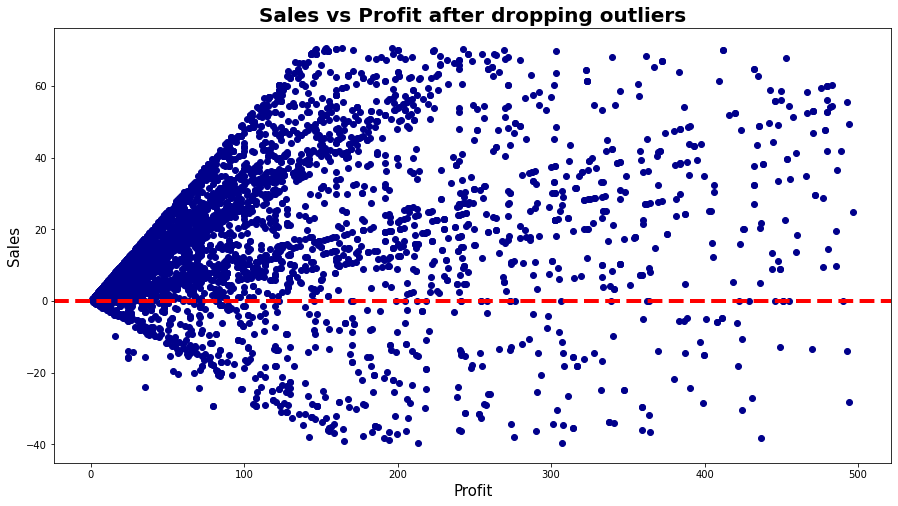

In [26]:
plt.figure(figsize = (15,8))
plt.scatter(df1['Sales'], df1['Profit'], color = 'darkblue')
plt.xlabel('Profit',fontsize = 15)
plt.ylabel('Sales',fontsize = 15)
plt.title('Sales vs Profit after dropping outliers', fontweight = 'bold', fontsize = 20)
plt.axhline(0, color = 'red', lw = 4, linestyle = '--') # To identify the point 0 on the graph

**Inference:** Basically, when the sales increases, the profit also increases. But, From the above plot, we can infer that, when the cost of sales is low, it gives more profit as more people tend to buy it. Whereas, when the cost of sales increases, it gives less profit as only few people tend to buy it.

Text(0.5, 1.0, 'Profit wise Discount vs Sales')

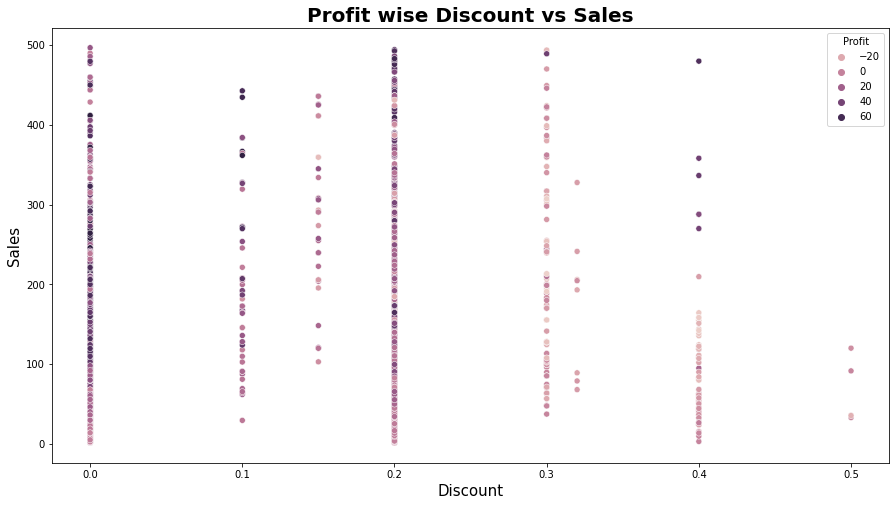

In [27]:
# profit wise discount vs sales

plt.figure(figsize = (15,8))
sns.scatterplot(df1['Discount'], df1['Sales'], hue = df1['Profit'])
plt.xlabel('Discount', fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
plt.title('Profit wise Discount vs Sales', fontsize = 20, fontweight = 'bold')

**Inference:** From the above plot, we can infer that, the discount of 0.0 has no loss in profit (ie., the negative values). And it is the discount with 0% which provides moderate sales with more profit rather than discounted sales.

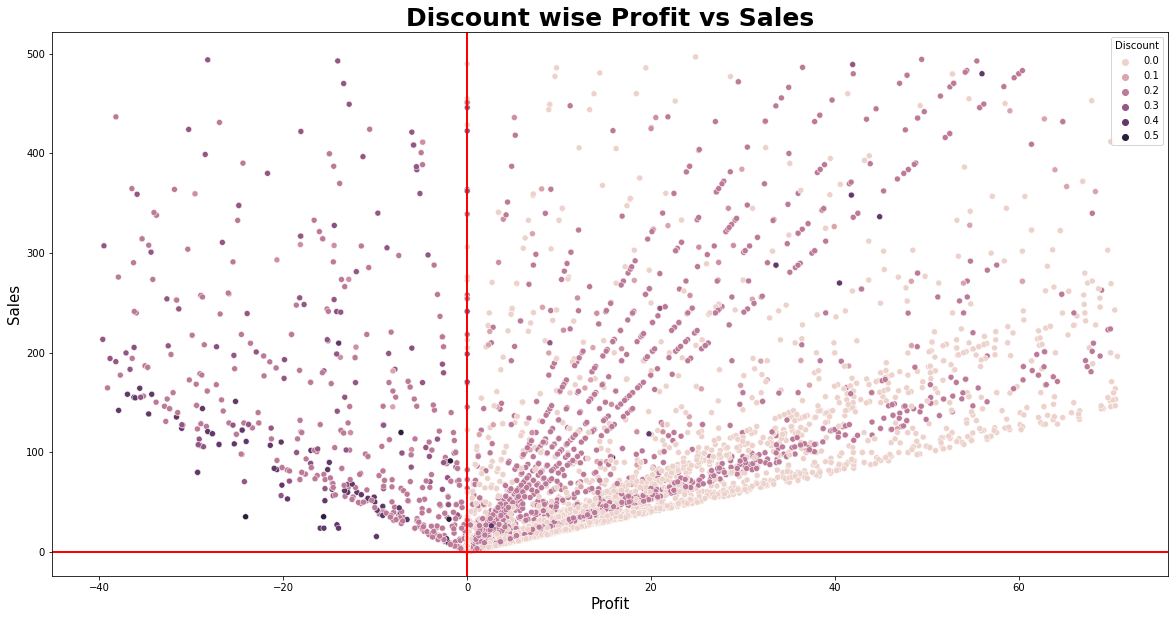

In [28]:
# Discount wise Sales vs Profit

plt.figure(figsize = (20,10))
sns.scatterplot(df1['Profit'], df1['Sales'], hue = df1['Discount'])
plt.xlabel('Profit', fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
plt.title('Discount wise Profit vs Sales', fontsize = 25, fontweight = 'bold')
plt.axvline(0.0, color = 'red', lw = 2)
plt.axhline(0.0, color = 'red', lw = 2)

**Inference:** Also, from this, we can say that, minimum sales has given more profit when the discount range was 0% and 20%.

**Inference on Sales:**

- The discount of 0% and 20% has provided more profit. But, the discount of 20% had loss of -20 in profit.


- Secondly, when the cost of the sales was low, it provided more profit. Whereas, when the cost of the sales was high, it provided less profit. 


- Also, the sales with no discount(0%) is somewhat low when compared to sales with 20% discount. But, the quantity and profit of 0% discount is high when compared to the quantity and profit of 20% discount. This is because when the quantity sold for 0% discount is higher, hence, it gives more profit. Whereas, the quantity sold for 20% discount is lower than the quantity sold for 0% discount. Hence, the profit is less when compared to the profit of 0% discount.

In [71]:
# # comparison of all discount ranges

print("\nCOMPARISON OF ALL DISCOUNT RANGES")
print("=================================")
# 0% 
print('\nDiscount of 0%:')
print("----------------")
print("Minimum value of 0% discount :",d0['Sales'].min())
print("Maximum value of 0% discount :",d0['Sales'].max())
print("Sales of 0% discount         :",round(d0['Sales'].sum(),2))
print("Profit                       :",round(d0['Profit'].sum(),2))
print("\n==============================================")

# 10%
print('\nDiscount of 10%:')
print("----------------")
print("Minimum value of 10% discount :",d10['Sales'].min())
print("Maximum value of 10% discount :",d10['Sales'].max())
print("Sales of 10% discount         :",round(d10['Sales'].sum(),2))
print("Profit                        :",round(d10['Profit'].sum(),2))
print("\n==============================================")

#15%
print('\nDiscount of 15%:')
print("----------------")
print("Minimum value of 15% discount :",d15['Sales'].min())
print("Maximum value of 15% discount :",d15['Sales'].max())
print("Sales of 15% discount         :",round(d15['Sales'].sum(),2))
print("Profit                        :",round(d15['Profit'].sum(),2))
print("\n==============================================")

# 20%
print('\nDiscount of 20%:')
print("----------------")
print("Minimum value of 20% discount :",d20['Sales'].min())
print("Maximum value of 20% discount :",d20['Sales'].max())
print("Sales of 20% discount         :",round(d20['Sales'].sum(),2))
print("Profit                        :",round(d20['Profit'].sum(),2))
print("\n==============================================")

# 30%
print('\nDiscount of 30%:')
print("----------------")
print("Minimum value of 30% discount :",d30['Sales'].min())
print("Maximum value of 30% discount :",d30['Sales'].max())
print("Sales of 30% discount         :",round(d30['Sales'].sum(),2))
print("Overall loss in Profit        :",round(d30['Profit'].sum(),2))
print("\n==============================================")

# 32%
print('\nDiscount of 32%:')
print("----------------")
print("Minimum value of 32% discount :",d32['Sales'].min())
print("Maximum value of 32% discount :",d32['Sales'].max())
print("Sales of 32% discount         :",round(d32['Sales'].sum(),2))
print("Overall loss in Profit        :",round(d32['Profit'].sum(),2))
print("\n==============================================")

# 40%
print('\nDiscount of 40%:')
print("----------------")
print("Minimum value of 40% discount :",d40['Sales'].min())
print("Maximum value of 40% discount :",d40['Sales'].max())
print("Sales of 40% discount         :",round(d40['Sales'].sum(),2))
print("Overall loss in Profit        :",round(d40['Profit'].sum(),2))
print("\n==============================================")

# 50%
print('\nDiscount of 50%:')
print("----------------")
print("Minimum value of 50% discount :",d50['Sales'].min())
print("Maximum value of 50% discount :",d50['Sales'].max())
print("Sales of 50% discount         :",round(d50['Sales'].sum(),2))
print("Overall loss in Profit        :",round(d50['Profit'].sum(),2))


COMPARISON OF ALL DISCOUNT RANGES

Discount of 0%:
----------------
Minimum value of 0% discount : 0.99
Maximum value of 0% discount : 496.86
Sales of 0% discount         : 243367.98
Profit                       : 65539.25


Discount of 10%:
----------------
Minimum value of 10% discount : 29.403
Maximum value of 10% discount : 442.764
Sales of 10% discount         : 10812.53
Profit                        : 1345.41


Discount of 15%:
----------------
Minimum value of 15% discount : 102.833
Maximum value of 15% discount : 435.999
Sales of 15% discount         : 9078.77
Profit                        : 145.34


Discount of 20%:
----------------
Minimum value of 20% discount : 1.344
Maximum value of 20% discount : 494.376
Sales of 20% discount         : 243883.18
Profit                        : 28364.14


Discount of 30%:
----------------
Minimum value of 30% discount : 37.296
Maximum value of 30% discount : 493.92
Sales of 30% discount         : 23270.99
Overall loss in Profit        : -

**INFERENCES:** 
- The success of 0% discount's profit is that, the minimum cost of the product sold is 0.99 and the maximum cost is 496.86 and the sales and profit is 243367.98 and 65539.2543 respectively. This is because, In other cases with discounts, the minimum value is greater than the minimum value of the 0% discount. 


### SHIP MODE vs SALES

In [33]:
res2 = df1.groupby('Ship Mode').sum()
res2.loc[:,'Sales']

Ship Mode
First Class        83618.0639
Same Day           27455.5770
Second Class      105404.0429
Standard Class    323297.9209
Name: Sales, dtype: float64

In [34]:
sm = [ sm for sm, df2 in df1.groupby('Ship Mode')]

Text(0.5, 1.0, 'Ship Mode vs Sales')

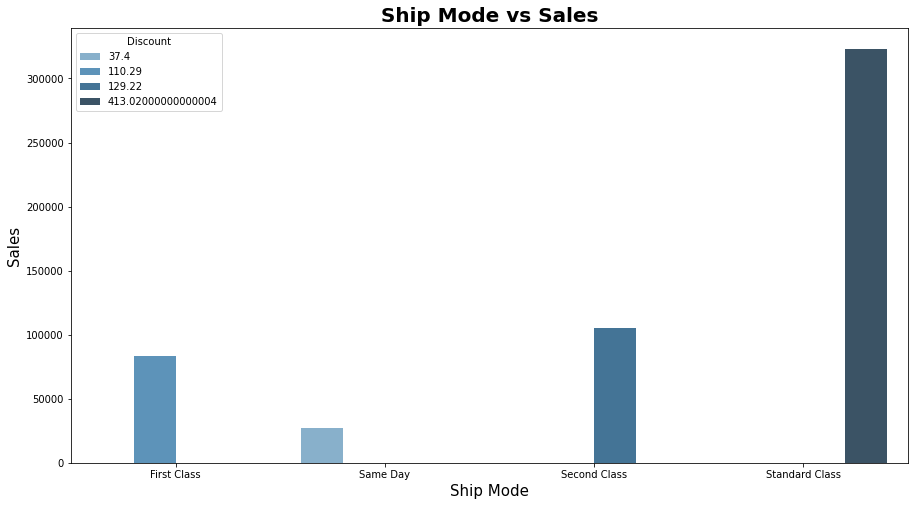

In [35]:
plt.figure(figsize = (15,8))
sns.barplot(x = sm, y = res2['Sales'], hue = 'Discount', data = res2, palette = 'Blues_d')
plt.xlabel('Ship Mode', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.title('Ship Mode vs Sales', fontsize = 20, fontweight = 'bold')

Text(0.5, 1.0, 'Ship Mode vs Sales')

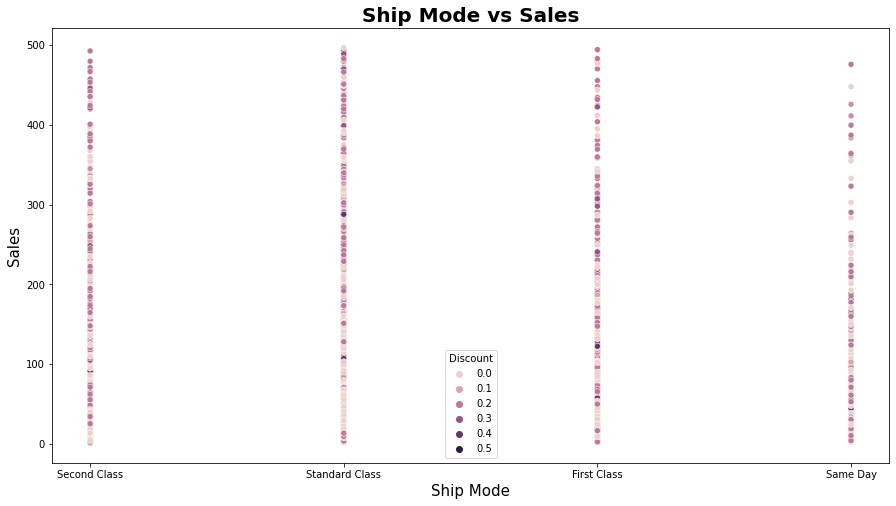

In [36]:
plt.figure(figsize = (15,8))
sns.scatterplot(df1['Ship Mode'], df1['Sales'], hue = df1['Discount'])
plt.xlabel('Ship Mode', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.title("Ship Mode vs Sales", fontsize = 20, fontweight = 'bold')

**Inference:** From the above two plots, we can infer that, the ship mode of 'Standard Class' provides more sales with 0% discount. Also, the ship mode of 'Second Class' provides provides average sales mostly with 0% and 20% discount.

### SEGMENT vs SALES

In [37]:
res3 = df1.groupby('Segment').sum()
res3.loc[:,'Sales']

Segment
Consumer       288655.4801
Corporate      161476.2972
Home Office     89643.8274
Name: Sales, dtype: float64

In [38]:
sgmt = [sgmt for sgmt, df2 in df1.groupby('Segment')]

Text(0.5, 1.0, 'Segment vs Sales')

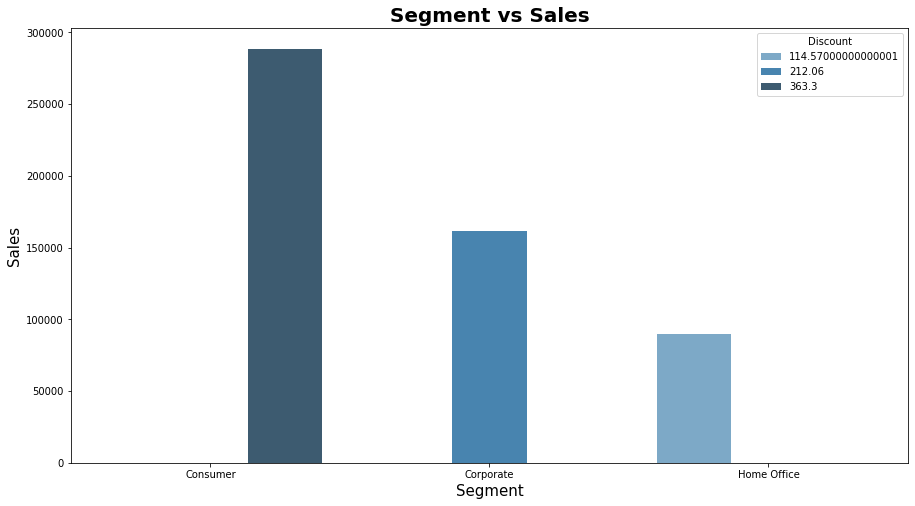

In [39]:
plt.figure(figsize = (15,8))
sns.barplot(x = sgmt, y = res3['Sales'], hue = 'Discount', data = res3, palette = 'Blues_d')
plt.xlabel('Segment', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.title('Segment vs Sales', fontsize = 20, fontweight = 'bold')

Text(0.5, 1.0, 'Segment vs Sales')

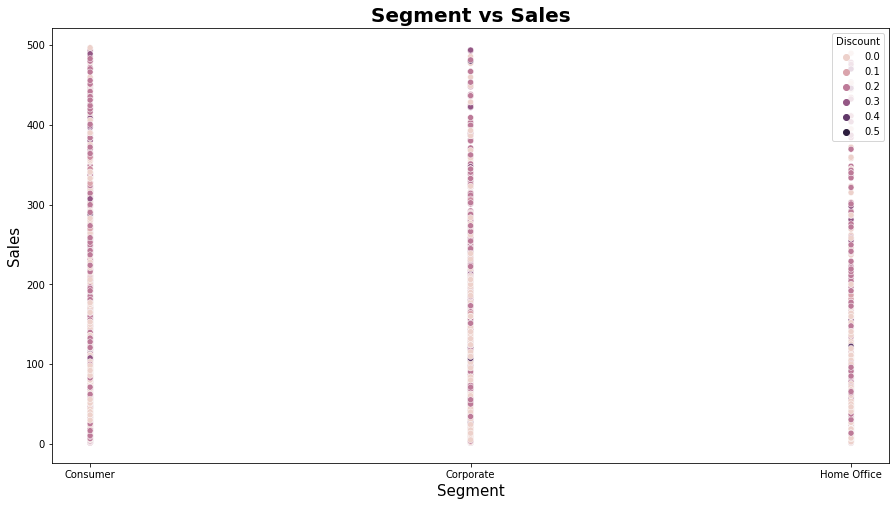

In [40]:
plt.figure(figsize = (15,8))
sns.scatterplot(df1['Segment'], df1['Sales'], hue = df1['Discount'])
plt.xlabel('Segment', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.title("Segment vs Sales", fontsize = 20, fontweight = 'bold')

**Inference:** From the above plot, we can infer that, the segment 'Consumer' provides more sales with 0% and 20%.

### STATE vs DISCOUNT

In [41]:
# Top 5 states with highest profits

res4 = df1.groupby('State').sum()
res4.loc[:,'Discount'].nlargest(5)

State
Texas           119.28
California      104.35
Pennsylvania     82.70
Ohio             67.70
Florida          52.40
Name: Discount, dtype: float64

In [42]:
states = [state for state, df2 in df1.groupby('State')]

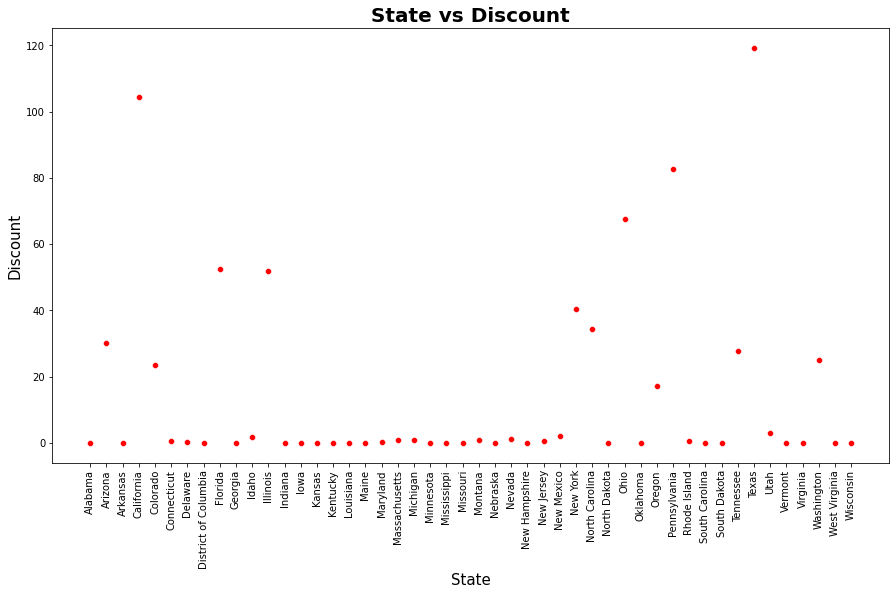

In [43]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = states, y = res4['Discount'], data = res4, color = 'red')
plt.title('State vs Discount', fontweight = 'bold', fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Discount', fontsize = 15)
plt.xticks(rotation = (90))
plt.show()

**Inference:** <br><br> From the above result and plot, we can conclude that, the top 5 states with highest discounts are: <br>
- Texas         -  119.28
- California    -  104.35
- Pennsylvania  -   82.70
- Ohio          -   67.70
- Florida       -   52.40

In [44]:
# why these states are providing high discounts and what type of products are they selling ?

dfs = df1[(df1['State'] == 'Texas') | (df1['State'] == 'California') | (df1['State'] == 'Pennsylvania') | (df1['State'] == 'Ohio') | (df1['State'] == 'Florida')]
dfs

,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,United States,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,United States,California,West,Office Supplies,Art,7.280,4,0.0,1.9656
8,Standard Class,Consumer,United States,California,West,Office Supplies,Binders,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...
9986,Standard Class,Consumer,United States,California,West,Technology,Accessories,36.240,1,0.0,15.2208
9989,Second Class,Consumer,United States,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,California,West,Technology,Phones,258.576,2,0.2,19.3932


In [45]:
dfs.groupby('State')['Discount'].sum()

State
California      104.35
Florida          52.40
Ohio             67.70
Pennsylvania     82.70
Texas           119.28
Name: Discount, dtype: float64

In [46]:
dfs.groupby('Category')['Discount'].sum()

# office supplies is providing more discounts. But in which countries ?

Category
Furniture           89.23
Office Supplies    234.40
Technology         102.80
Name: Discount, dtype: float64

**Inference:** Since, the discount provided in the states of 'Texas' and 'California' are very much high than others. The category 'Office Supplies' is also sold more in the state of 'California' and 'Texas'.

### CATEGORY vs DISCOUNT

In [47]:
res5 = df1.groupby('Category').sum()
res5.loc[:,'Sales']

Category
Furniture          165795.4857
Office Supplies    227692.2550
Technology         146287.8640
Name: Sales, dtype: float64

In [48]:
# Cateopry wise profit

df1.groupby('Category')['Profit'].sum()

Category
Furniture          14315.3656
Office Supplies    57474.5751
Technology         20919.7379
Name: Profit, dtype: float64

In [49]:
cat = [cat for cat, df2 in df1.groupby('Category')]

Text(0, 0.5, 'Sales')

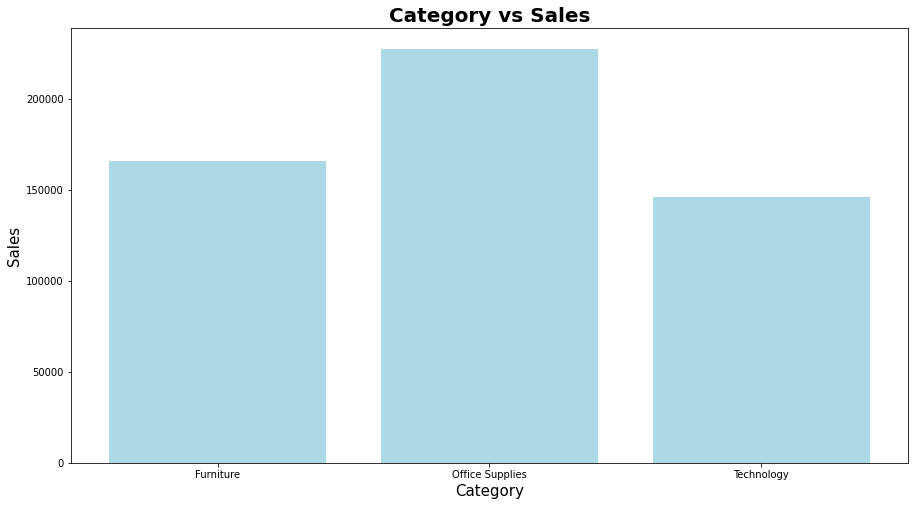

In [50]:
plt.figure(figsize = (15,8))
plt.bar(cat, res5['Sales'], color = 'lightblue')
plt.title('Category vs Sales', fontsize = 20, fontweight = 'bold')
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)

**Inference:** From the above plot, we can infer that, the category 'Office Supplies' gives more profit and more sales.

### SUB - CATEGORY vs SALES

In [51]:
# sub - category wise sales

res6 = df1.groupby('Sub-Category').sum()
res6.loc[:,'Sales']

Sub-Category
Accessories    59753.8520
Appliances     27826.7470
Art            23161.1280
Binders        30665.2220
Bookcases      26798.1167
Chairs         68632.7870
Copiers         1439.9520
Envelopes       9281.6620
Fasteners       2730.6480
Furnishings    49932.8300
Labels          7890.2260
Machines        2969.9960
Paper          45908.3640
Phones         82124.0640
Storage        72045.6580
Supplies        8182.6000
Tables         20431.7520
Name: Sales, dtype: float64

In [52]:
sub_cat = [sub for sub, df2 in df1.groupby('Sub-Category')]

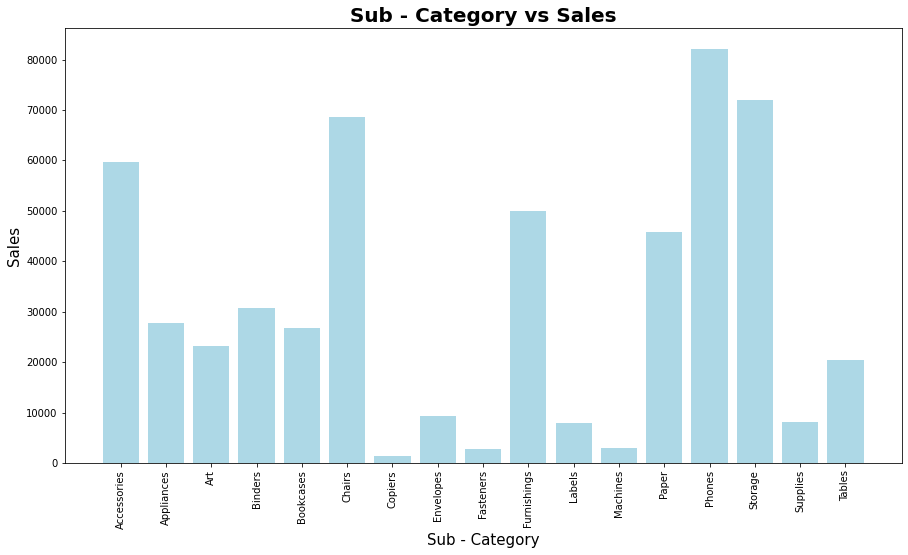

In [53]:
plt.figure(figsize = (15,8))
plt.bar(sub_cat, res6['Sales'], color = 'lightblue')
plt.title('Sub - Category vs Sales', fontsize = 20, fontweight = 'bold')
plt.xlabel('Sub - Category', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
# plt.axhline( 19400.5435, linestyle = '--', color = 'red')
plt.xticks(rotation = (90))
plt.show()

**Inference:** From the above plot, we can infer that, the sub - categories 'Phones' and 'Storage' from the category 'Technology' sells in a higher quantity than others.

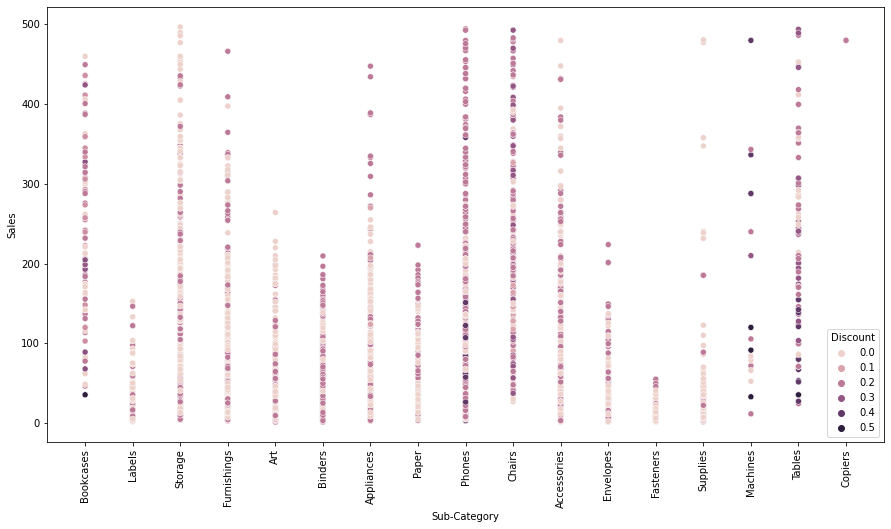

In [54]:
# Discount wise Sub-Categories

plt.figure(figsize = (15,8))
sns.scatterplot(df1['Sub-Category'], df1['Sales'], hue = df1['Discount'])
plt.xticks(rotation = (90))
plt.show()

**Inference:** Since, the discounts are provided in a high range of 0% and 20% to the sub - categories 'Storage' and 'Phones'. They are sold at highly than others.

### QUANTITY vs SALES

In [55]:
res7 = df1.groupby('Quantity').sum()
res7.loc[:,'Sales']

Quantity
1     36683.2180
2    127298.5294
3    145935.9912
4     68891.5216
5     69130.1495
6     32356.3020
7     35061.0680
8     11763.3760
9     12655.4490
Name: Sales, dtype: float64

In [56]:
qnt = [qnt for qnt, df2 in df1.groupby('Quantity')]

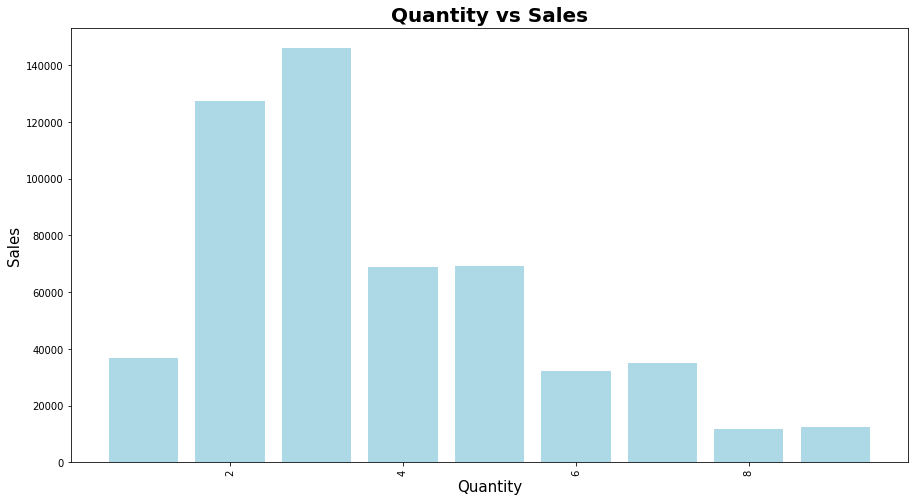

In [57]:
plt.figure(figsize = (15,8))
plt.bar(qnt, res7['Sales'], color = 'lightblue')
plt.title('Quantity vs Sales', fontsize = 20, fontweight = 'bold')
plt.xlabel('Quantity', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
# plt.axhline(22851.7503, linestyle = '--', color = 'red')
plt.xticks(rotation = (90))
plt.show()

<AxesSubplot:xlabel='Quantity', ylabel='Sales'>

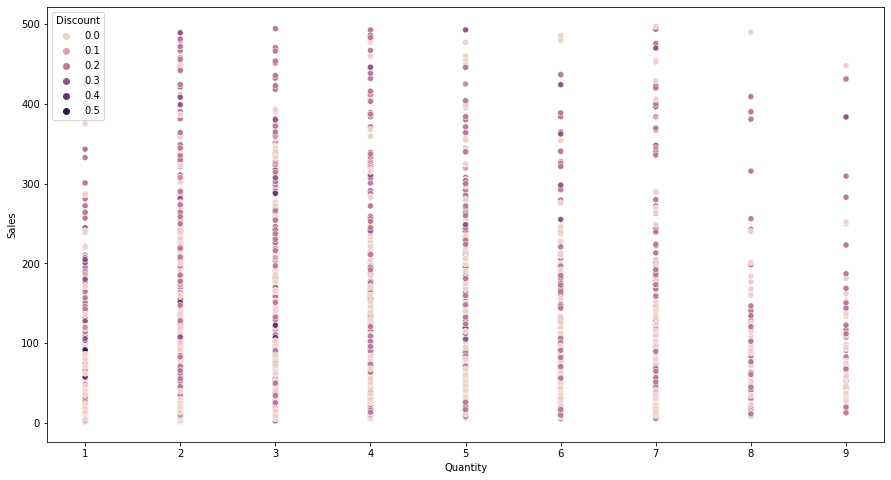

In [58]:
# Discount wise Quantity

plt.figure(figsize = (15,8))
sns.scatterplot(df1['Quantity'], df1['Sales'], hue = df1['Discount'])

**Inference:** From the above first plot, we can infer that, the quantity of 2 and 3 have more sales than others. This is because, the discounts are mostly provided at a range of 0% and 20% which can inferred from the second scatter plot. Hence, it provides more sales than others.

### REGION vs SALES

In [59]:
## Region

df1.groupby('Region').sum()

,Sales,Quantity,Discount,Profit
Region,,,,
Central,110760.1242,4931,172.18,17289.3809
East,138572.0820,6838,194.20,24919.1171
South,85829.8080,3999,114.50,15687.7682
West,204613.5905,8519,209.05,34813.4124


In [60]:
res8 = df1.groupby('Region').sum()
res8.loc[:,'Sales']

Region
Central    110760.1242
East       138572.0820
South       85829.8080
West       204613.5905
Name: Sales, dtype: float64

In [61]:
rgn = [ rgn for rgn, df2 in df1.groupby('Region')]

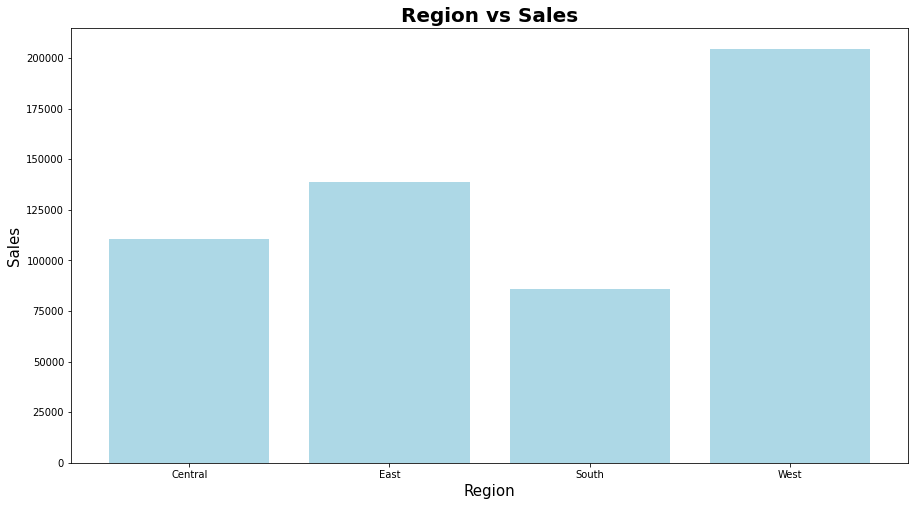

In [62]:
plt.figure(figsize = (15,8))
plt.bar(rgn, res8['Sales'], color = 'lightblue')
plt.title('Region vs Sales', fontsize = 20, fontweight = 'bold')
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
# plt.axhline(34813.4124, linestyle = '--', color = 'red')
plt.show()

<AxesSubplot:xlabel='Region', ylabel='Sales'>

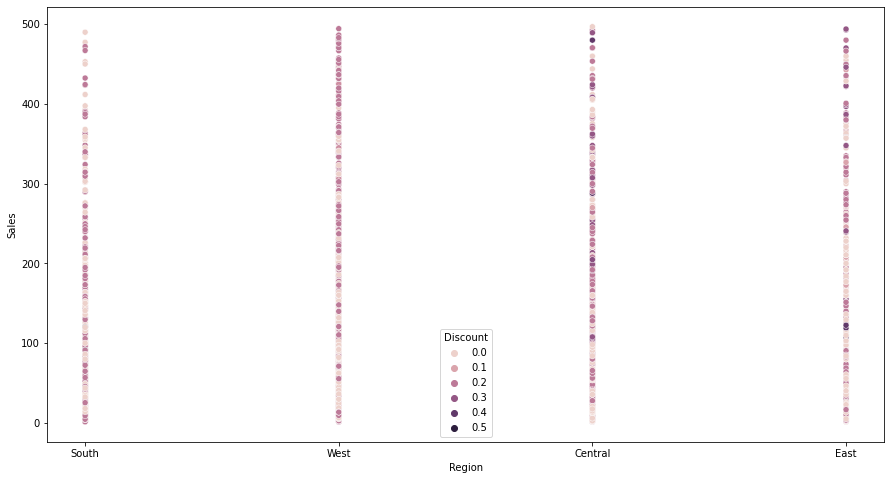

In [63]:
# Region wise Discount 

plt.figure(figsize = (15,8))
sns.scatterplot(df1['Region'], df1['Sales'], hue = df1['Discount'])

**Inference:** From the above first plot, we can infer that, the region 'West' provides high sales. This is because, the discounts are mostly provided at a range of 0% and 20% which can inferred from the second scatter plot. Hence, it provides more sales than others.

### DISCOUNT vs SALES

In [64]:
res9 = df1.groupby('Discount').sum()
res9.loc[:,'Sales']

Discount
0.00    243367.9800
0.10     10812.5280
0.15      9078.7735
0.20    243883.1760
0.30     23270.9890
0.32      1614.0412
0.40      7432.7220
0.50       315.3950
Name: Sales, dtype: float64

In [65]:
dis = [ dis for dis, df2 in df1.groupby('Discount')]

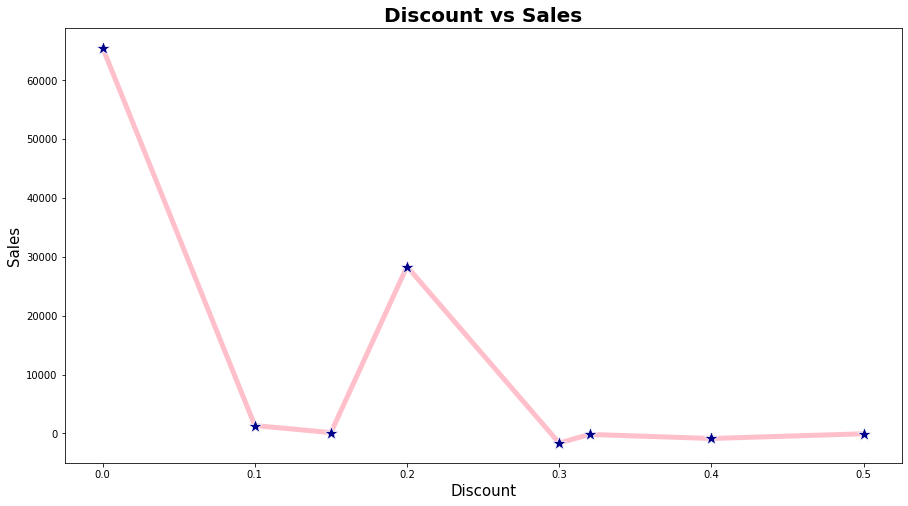

In [66]:
plt.figure(figsize = (15,8))
sns.lineplot(dis, res9['Profit'], color = 'pink', marker = "*", markersize = 15, markerfacecolor = 'darkblue', linewidth = 5)
plt.title('Discount vs Sales', fontsize = 20, fontweight = 'bold')
plt.xlabel('Discount', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.show()

**Inference:** From the above plot, we can infer that, the discount range of 0% ie., 0.0 gives more sales. Secondly, the discount range of 20% ie., 0.2 gives moderate sales. 

# Conclusion:

#### - From the above analysis, we can conclude that, 0% discount gives moderate sales with more profit and 20% discount gives provides more sales with moderate quantity.

#### - Also, when there are no heavy discounts, there won't be much loss in profit and increases the profit and sales as expected.

#### - Since, 0% discount provides sell sales with more quantity and more profit. Hence, I recommend to sell products at 0% discount, that is products with no discount at lowest price which makes more sales and more profit to the organization.